In [61]:
# Problem Statement
# Predicting Customer Churn in a Bank

#The objective of this dataset is to develop a comprehensive model which identifies customers who are likely to leave the bank leveraging demographic, 
#financial and behavioral attributes. The goal is to provide actionable insights that the bank can use to develop targeted retention strategies.


In [62]:
# Importing the prominent library used in this model
import pandas as pd

In [63]:
# Reading the file location
df= pd.read_csv("C://Users//ARNESH//Downloads//Churn_Modelling.csv")

In [64]:
# Checing the dataset heads
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [65]:
# Checking for simple descriptive statistics
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [66]:
# To check whether the data has missing values or not
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [67]:

df.drop(['CustomerId','RowNumber','Surname'],axis=1,inplace=True)

In [68]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [69]:
# Performing Encoding on Categorical Variables

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [71]:
# The data has two categorical columns naming geography and gender.
# We have normalized the labels as Geography_Enc and Gender_Enc to convert them into continuous variables.

df['Geography_Enc'] = le.fit_transform(df['Geography'])
df['Gender_Enc'] = le.fit_transform(df['Gender'])

In [72]:
# Performing Scalling on continuos variables
# This will standardize the input data in such a way that each feature has mean of 0 and a standard deviation of 1.

In [73]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [74]:
# The two colums named as Estimated Salary and Balance have higher values. 
# After running the code the value of the two stated columns has been standardized as such that the value has been centered around 0 and the standard deviation is 1.

df['EstimatedSalary']=ss.fit_transform(df[['EstimatedSalary']])
df['Balance']=ss.fit_transform(df[['Balance']])

In [75]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Enc,Gender_Enc
0,619,France,Female,42,2,-1.225848,1,1,1,0.021886,1,0,0
1,608,Spain,Female,41,1,0.117350,1,0,1,0.216534,0,2,0
2,502,France,Female,42,8,1.333053,3,1,0,0.240687,1,0,0
3,699,France,Female,39,1,-1.225848,2,0,0,-0.108918,0,0,0
4,850,Spain,Female,43,2,0.785728,1,1,1,-0.365276,0,2,0


In [76]:
# Dividing the dataset into training and testing parts

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x= df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary', 'Geography_Enc','Gender_Enc']]
y= df['Exited']

In [79]:
# For this model we have taken 70% of the dataset for training and remaining 30% for the testing part.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [80]:
# Importing the Decision Tree Classifier from the sklearn.tree

In [81]:
from sklearn.tree import DecisionTreeClassifier as dtree
dt= dtree()

In [82]:
# From this code the decisiontreeclassifier learns from the training data which enables it to make predictions.

dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [83]:
# The code essentially takes a trained decision tree model (dt) and uses it to make predictions on a dataset represented by x_test. 
# The predicted values are then stored in the variable y_pred.

In [84]:
y_pred = dt.predict(x_test)

In [85]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [86]:
y_test

4322    0
6077    0
4615    0
7432    0
801     0
       ..
6158    0
6889    0
8416    0
9264    0
6661    0
Name: Exited, Length: 3000, dtype: int64

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [88]:
# Accuracy measures the proportion of correctly predicted instance out of the total instances.
# Approximately 78.87% of the predictions made by the classifier are correct. 
#This means that out of all the samples, about 78.87% were correctly classified.

# Precision measures the proportion of true positive predictions out of all positive predictions made by the classifier.
# The precision comes out to be 50%. This indicates that half of the positive predictions are actually correct while the other half are false positives.

# Recall (or sensitivity) measures the proportion of true positive predictions out of all actual positive instances.
# Approximately 49.05% of the actual positive instances are correctly identified by the classifier.
# This means the classifier is missing a significant portion of the actual positive instances resulting in false negatives.

# The F1 score is the harmonic mean of precision and recall providing a balance between the two metrics.
# The F1 score comes out to be 0.4952 which signifies there is a balance between precision and recall.

In [89]:
print ("Decision Tree Classifier...")
print("accuracy: ",accuracy_score(y_pred,y_test), "precision: ", precision_score(y_pred,y_test), "recall: ", recall_score(y_pred,y_test), "F1 score: ", f1_score(y_pred,y_test))

Decision Tree Classifier...
accuracy:  0.7923333333333333 precision:  0.5073649754500819 recall:  0.49050632911392406 F1 score:  0.498793242156074


In [90]:
import pandas as pd
feature_imp = pd.Series(dt.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_imp

# Here we try to extract the scores that represents how much the particular feature contributes the model's prediction and then sorting the series in descending order from most importance to least importance.

Age                0.221319
EstimatedSalary    0.160838
CreditScore        0.152086
Balance            0.140970
NumOfProducts      0.120054
Tenure             0.069845
IsActiveMember     0.067511
Geography_Enc      0.036702
HasCrCard          0.016335
Gender_Enc         0.014339
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


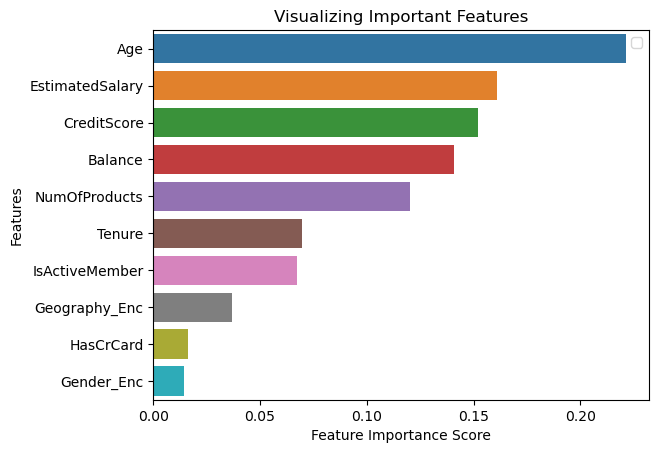

In [91]:
# Visualizing feature important results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [92]:
from sklearn.tree import plot_tree

[Text(0.5, 0.875, 'node #0\nAge <= 44.5\ngini = 0.324\nsamples = 7000\nvalue = [5574, 1426]\nclass = 0'),
 Text(0.25, 0.625, 'node #1\nNumOfProducts <= 2.5\ngini = 0.222\nsamples = 5342\nvalue = [4663, 679]\nclass = 0'),
 Text(0.125, 0.375, 'node #2\nNumOfProducts <= 1.5\ngini = 0.198\nsamples = 5220\nvalue = [4640, 580]\nclass = 0'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'node #1313\nBalance <= -0.329\ngini = 0.306\nsamples = 122\nvalue = [23, 99]\nclass = 1'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'node #1352\nIsActiveMember <= 0.5\ngini = 0.495\nsamples = 1658\nvalue = [911, 747]\nclass = 0'),
 Text(0.625, 0.375, 'node #1353\nAge <= 50.5\ngini = 0.439\nsamples = 716\nvalue = [233, 483]\nclass = 1'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'node #1648\nNumOfProducts <= 2.5\ngini = 0.403\nsamples = 942\nvalue =

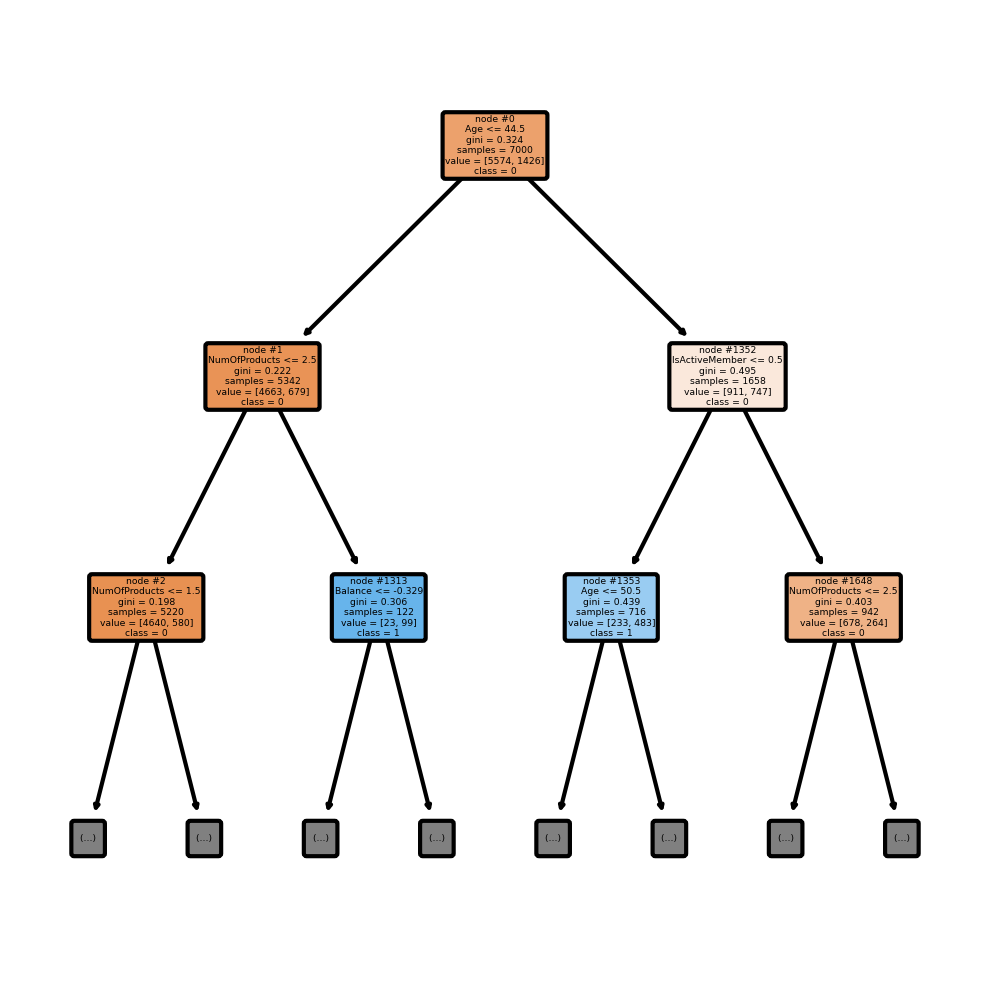

In [93]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
tree.plot_tree(dt, max_depth = 2,  
            rounded = True, 
            filled = True, 
            impurity = True,
            node_ids = True,
            feature_names = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Geography_Enc','Gender_Enc'],
            class_names = ["0","1"]
              )

In [94]:
#Interpretation of the decision tree
#The decision tree here is predicting the likelihood of customers exiting a service, with the dependent variable being 'Exited.' The tree is constructed using various features including 'CreditScore,' 'Age,' 'Tenure,' 'Balance,' 'NumOfProducts,' 'HasCrCard,' 'IsActiveMember,' 'EstimatedSalary,' 'Geography_Enc,' and 'Gender_Enc'.
#The root node (node #0) splits according to the ‘Age’ feature with threshold of 44.5.There are 7000 samples in this node whose Gini impurity is 0.323 indicating some level of class indications, which consists of 5559 non-exiters (class 0) and 1441 exiters (class 1).
#The left child node of the root node denoted as node #1 uses ‘NumOfProducts’ to divide into two sections where 2.5 acts as the division mark. Gini impurity is lower here with its value being 0.221 while 5312 are also found in this area out of which most are people who did not leave (4699) rather than those who had.
#The item to the far-left where the split occurred (node #2) is ‘NumOfProducts’ with a cutoff of 1.5 leading to a Gini index of 0.197. This node consists of 3254 samples and most (2671) among them are non-exiters while 583 samples are exiters.
#Splitting through the balance, the best possible split from node #1 to node #1333 occurs when the threshold is -0.854. A gini impurity of 0.35 is what this node possesses as it has 174 samples, which consist of 78 non-exiters and 96 exiters.
#The right child of the root node (node #1374) splits on ‘IsActiveMember’ with a threshold of 0.5. This node demonstrates a greater Gini impurity of 0.462, while it has 1688 samples that include 986 non-exiters and 736 exiters.
#The left side of node #1374 (node #1373) splits on the variable ‘Age’ at 50.5 years. There are 694 samples contained in this node that have a Gini impurity of 0.434, including 225 non-exiters and 469 exiters, suggesting that older active members tend to exit more frequently.
#The right side the 1374th node (number 1686 in parenthesis) occurred when the division occurred on “NumOfProducts”. This particular node exhibits a Gini impurity of worth 0.41 while it encompasses a total of 928 samples; out of which there are 661 that are not exiters then there exist 267 as exiters.


In [95]:
from sklearn.metrics import confusion_matrix

In [96]:
confusion_matrix(y_test, y_pred) #Creating confusion matrix

array([[2067,  322],
       [ 301,  310]], dtype=int64)

In [97]:
!pip install catboost

In [98]:
from catboost import CatBoostClassifier
#CatBoostClassifier is a machine learning algorithm based on gradient boosting over decision trees. It is designed to handle categorical features efficiently and is particularly useful when working with large datasets that include many categorical variables. CatBoost stands out for its ability to process categorical data directly without the need for extensive preprocessing such as one-hot encoding.

In [99]:
ctb= CatBoostClassifier()

In [100]:
ctb.fit(x_train,y_train)

Learning rate set to 0.023648
0:	learn: 0.6724350	total: 3.69ms	remaining: 3.69s
1:	learn: 0.6542877	total: 6.99ms	remaining: 3.49s
2:	learn: 0.6366154	total: 10ms	remaining: 3.33s
3:	learn: 0.6189118	total: 13ms	remaining: 3.25s
4:	learn: 0.6049758	total: 15.6ms	remaining: 3.1s
5:	learn: 0.5898623	total: 18.6ms	remaining: 3.08s
6:	learn: 0.5760845	total: 21.6ms	remaining: 3.06s
7:	learn: 0.5627068	total: 24.6ms	remaining: 3.05s
8:	learn: 0.5505933	total: 27.8ms	remaining: 3.06s
9:	learn: 0.5397434	total: 30.7ms	remaining: 3.04s
10:	learn: 0.5293301	total: 33.6ms	remaining: 3.02s
11:	learn: 0.5193155	total: 36.6ms	remaining: 3.01s
12:	learn: 0.5122629	total: 38.6ms	remaining: 2.93s
13:	learn: 0.5034352	total: 41.8ms	remaining: 2.94s
14:	learn: 0.4944440	total: 45ms	remaining: 2.96s
15:	learn: 0.4860098	total: 47.9ms	remaining: 2.95s
16:	learn: 0.4774505	total: 51.1ms	remaining: 2.95s
17:	learn: 0.4703891	total: 54ms	remaining: 2.95s
18:	learn: 0.4650050	total: 56.8ms	remaining: 2.93s
1

In [101]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [102]:
estimators = []
estimators.append(("CatBoost", CatBoostClassifier()))

In [103]:
y_test

4322    0
6077    0
4615    0
7432    0
801     0
       ..
6158    0
6889    0
8416    0
9264    0
6661    0
Name: Exited, Length: 3000, dtype: int64

In [104]:
print ("Cat Boost Classifier...")
print("accuracy: ",accuracy_score(y_pred,y_test), "precision: ", precision_score(y_pred,y_test), "recall: ", recall_score(y_pred,y_test), "F1 score: ", f1_score(y_pred,y_test))

Cat Boost Classifier...
accuracy:  0.7923333333333333 precision:  0.5073649754500819 recall:  0.49050632911392406 F1 score:  0.498793242156074


In [105]:
# Accuracy measures the proportion of correctly predicted instance out of the total instances.
# Approximately 77.97% of the predictions made by the classifier are correct. 
#This means that out of all the samples, about 77.97% were correctly classified.

# Precision measures the proportion of true positive predictions out of all positive predictions made by the classifier.
# The precision comes out to be 48%. This indicates that almost half of the positive predictions are actually correct while the other half are false positives.This suggests the model is prone to incorrectly predicting that customers will exit.

# Recall (or sensitivity) measures the proportion of true positive predictions out of all actual positive instances.
# Approximately 45.87% of the actual positive instances are correctly identified by the classifier.
# This means the classifier is missing a significant portion of the actual positive instances resulting in false negatives.

# The F1 score is the harmonic mean of precision and recall providing a balance between the two metrics.
# The F1 score comes out to be 0.4952 which signifies there is a balance between precision and recall.It highlights the model's struggles with both precision and recall.

In [106]:
from sklearn.ensemble import StackingClassifier
SC = StackingClassifier(estimators=estimators,final_estimator=ctb)
SC.fit(x_train, y_train)
y_pred = SC.predict(x_test)

print(f"\nStacking classifier training Accuracy: {SC.score(x_train, y_train):0.2f}")
print(f"Stacking classifier test Accuracy: {SC.score(x_test, y_test):0.2f}")

Learning rate set to 0.023648
0:	learn: 0.6724350	total: 7.02ms	remaining: 7.01s
1:	learn: 0.6542877	total: 14.9ms	remaining: 7.43s
2:	learn: 0.6366154	total: 21.8ms	remaining: 7.26s
3:	learn: 0.6189118	total: 29.8ms	remaining: 7.42s
4:	learn: 0.6049758	total: 35ms	remaining: 6.97s
5:	learn: 0.5898623	total: 40.6ms	remaining: 6.72s
6:	learn: 0.5760845	total: 45.8ms	remaining: 6.5s
7:	learn: 0.5627068	total: 50.3ms	remaining: 6.24s
8:	learn: 0.5505933	total: 54.3ms	remaining: 5.97s
9:	learn: 0.5397434	total: 58.2ms	remaining: 5.76s
10:	learn: 0.5293301	total: 62.5ms	remaining: 5.62s
11:	learn: 0.5193155	total: 66ms	remaining: 5.44s
12:	learn: 0.5122629	total: 69.3ms	remaining: 5.26s
13:	learn: 0.5034352	total: 73ms	remaining: 5.14s
14:	learn: 0.4944440	total: 77.2ms	remaining: 5.07s
15:	learn: 0.4860098	total: 81.5ms	remaining: 5.01s
16:	learn: 0.4774505	total: 85.5ms	remaining: 4.94s
17:	learn: 0.4703891	total: 89.8ms	remaining: 4.9s
18:	learn: 0.4650050	total: 93.8ms	remaining: 4.84s


In [107]:
SC.score(x_train, y_train)

0.9068571428571428

In [108]:
#The StackingClassifier combines multiple base estimators to improve predictive performance.Here,StackingClassifier is using CatBoostClassifier as the final estimator.
#The training accuracy of 91% indicates that the StackingClassifier model has effectively learned from the training data, capturing the underlying patterns with a high degree of accuracy. This high accuracy suggests that the model fits the training data well.
#The test accuracy of 87% is slightly lower than the training accuracy but still relatively high. This indicates that the model generalizes well to new, unseen data, maintaining good predictive performance.
#The small difference between training and test accuracy (4 percentage points) suggests that the model does not suffer significantly from overfitting. Overfitting occurs when a model performs well on training data but poorly on test data due to memorizing the training data rather than learning generalizable patterns.

In [109]:
new_data = pd.read_csv("C://Users//ARNESH//OneDrive//New Churn Data.csv")

In [110]:
new_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Enc,Gender_Enc
0,619,42,2,0,1,1,1,101348.88,0,0


In [111]:
dt.predict(new_data)

array([1], dtype=int64)

In [112]:
#The data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank or he continues to be a customer. 
#Here, the array is 0, indicating that the decision tree predicts that the customer is not leaving the bank and continue its services with the respective bank.

In [113]:
print("Measurement Metrics for Decision Tree:")
print("Accuracy score is:",accuracy_score(y_test, y_pred))
print("Precision score is:",precision_score(y_test, y_pred))
print("Recall is:",recall_score(y_test, y_pred))
print("F1 score is:",f1_score(y_test, y_pred))
print("  ")
print("Measurement Metrics for CatBoost:")
print("Accuracy:",accuracy_score(y_test, y_pred))
print ("Precision ", precision_score(y_test, y_pred))
print ("Recall ",recall_score(y_test, y_pred))
print ("F1 Score ",f1_score(y_test, y_pred))

Measurement Metrics for Decision Tree:
Accuracy score is: 0.862
Precision score is: 0.7728531855955678
Recall is: 0.45662847790507366
F1 score is: 0.5740740740740742
  
Measurement Metrics for CatBoost:
Accuracy: 0.862
Precision  0.7728531855955678
Recall  0.45662847790507366
F1 Score  0.5740740740740742


In [114]:
#As can be seen from the above summary of measurement metrics for all the algorithms used to analyze in this project to predict 
#the churn rate in a bank.
# Both models have a relatively high accuracy, which suggests they perform well in general.
# The precision is quite good indicating that the models are effective at identifying non-churn customers correctly when they predict churn. 
# However, it suggests that there are still some false positives.
# The recall of is lower indicating that the models miss a significant portion of actual churns. 
# The F1 score reflects the balance between precision and recall. Given that recall is relatively low, this F1 score indicates that while the models are good at making correct positive predictions they are not as good at capturing all the actual churns